# Trustworthiness Index

In this notebook I first reproduce the methods used in the paper "Birds of a feather scam together: trustworthiness homophily in a business network" by Barone and Coscia to ensure the validity of the methods, and then apply it to the ITN data.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
import sys;sys.path.append("../")
from utils import *
import itertools

#### Replicate 'Birds of a feather scam together' toy example

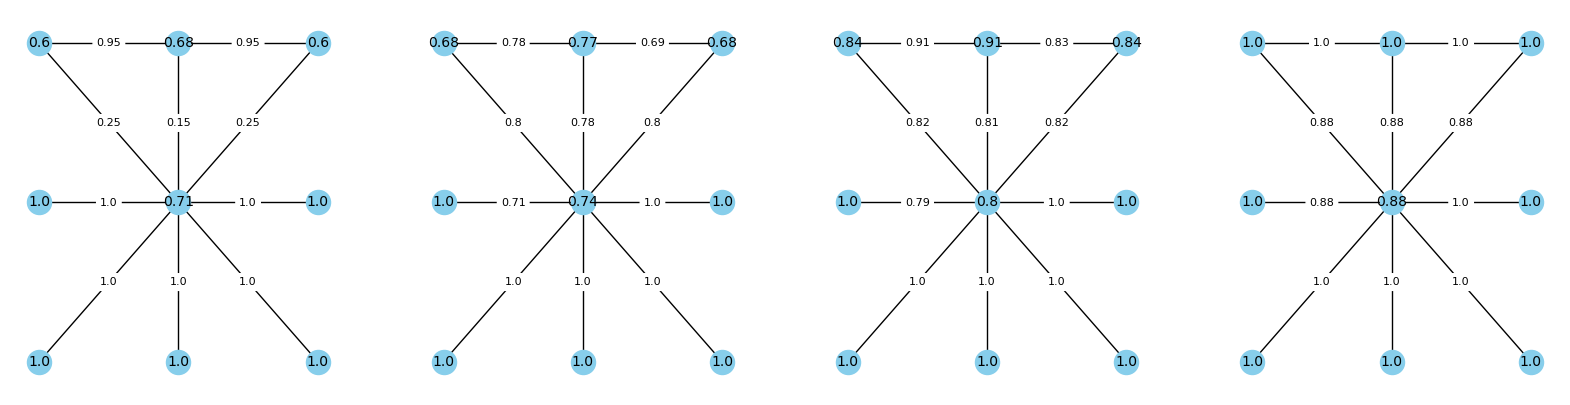

In [6]:
test = pd.DataFrame([
        ["a", "b", 90, 91],
        ["b", "a", 100, 100],
        ["b", "c", 90, 91],
        ["c", "b", 100, 100],
        ["a", "e", 14, 15],
        ["e", "a", 100, 100],
        ["b", "e", 1, 15],
        ["e", "b", 100, 100],
        ["c", "e", 14, 15],
        ["e", "c", 100, 100],
        ["d", "e", 100, 100],
        ["e", "d", 100, 100],
        ["e", "f", 100, 100],
        ["f", "e", 100, 100],
        ["g", "e", 100, 100],
        ["e", "g", 100, 100],
        ["h", "e", 100, 100],
        ["e", "h", 100, 100],
        ["i", "e", 100, 100],
        ["e", "i", 100, 100],
        ], columns=["country_id", "partner_country_id", "export_value", "import_value"])

fig, ax = plt.subplots(1,4, figsize=(20,5))

for ix, j in enumerate([0, 1, 5, 100]):
    P_prime, avg_trust = compute_trustworthiness(test, n_iter=j)
    P_prime["T_ab"] = P_prime["T_ab"].round(2)
    nodes_attr = P_prime[["country_id_x", "T_a"]].groupby("country_id_x").max().reset_index()
    nodes_attr["T_a"] = nodes_attr["T_a"].round(2)
    #print(_)
    G = nx.from_pandas_edgelist(P_prime, source="country_id_x", target="partner_country_id_x", edge_attr="T_ab")
    pos = {"a": (0,2), "b": (1,2), "c": (2,2), "d": (0,1), "e": (1,1), "f": (2, 1), "g": (0,0), "h": (1,0), "i": (2,0)}
    nod_labels = nodes_attr.set_index("country_id_x").to_dict()["T_a"]
    nx.draw(G, pos=pos, with_labels=False, node_color="skyblue", font_size=8, ax=ax[ix])
    nx.draw_networkx_labels(G, pos, labels=nod_labels, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', ax=ax[ix])
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'T_ab'), label_pos=0.5,  rotate=False, font_size=8, ax=ax[ix])

plt.show()

## ITN Data

In [2]:
countries = pd.read_csv(f"{data_paths['atlas']}/location_country.csv")
bilateral = pd.read_parquet(f"{data_paths['uncomtrade']}/bilateral.parquet")
reporters = pd.read_csv(f"{data_paths['uncomtrade']}/reporters.csv")

In [ ]:
trustworthiness_scores = pd.DataFrame()

for cmd in [f"{x:02d}" for x in range(1, 100)]:

   if cmd in ["77", "98"]: # Not valid codes
      continue

   for year in range(2012,2023):
      print(year, cmd)
      yearly_data = bilateral[(bilateral.period == str(year)) & (bilateral.cmdCode == cmd)]
      yearly_data = yearly_data[["reporterCode", "partnerCode", "primaryValue"]].merge(yearly_data[["reporterCode", "partnerCode", "mirrorPrimaryValue"]], \
                                                                        left_on=["reporterCode", "partnerCode"], right_on=["partnerCode", "reporterCode"],\
                                                                           suffixes=(None, "_x"))
      yearly_data.drop(columns=["reporterCode_x", "partnerCode_x"], inplace=True)
      yearly_data.columns = ["country_id", "partner_country_id", "export_value", "import_value"]
      yearly_data.reset_index(drop=True, inplace=True)
      
      trustworthiness_scores_, avg_trust = compute_trustworthiness(yearly_data, n_iter=100)
      trustworthiness_scores_ = trustworthiness_scores_[["country_id_x", "T_a"]].drop_duplicates(subset=["country_id_x"], keep="first")
      trustworthiness_scores_.columns = ["country_id", "trustworthiness"]
      trustworthiness_scores_["year"] = year
      trustworthiness_scores_["cmd"] = cmd
      trustworthiness_scores = pd.concat([trustworthiness_scores, trustworthiness_scores_])

2012 01
2013 01
2014 01
2015 01
2016 01
2017 01
2018 01
2019 01
2020 01
2021 01
2022 01
2012 02
2013 02
2014 02
2015 02
2016 02
2017 02
2018 02
2019 02
2020 02
2021 02
2022 02
2012 03
2013 03
2014 03
2015 03
2016 03
2017 03
2018 03
2019 03
2020 03
2021 03
2022 03
2012 04
2013 04
2014 04
2015 04
2016 04
2017 04
2018 04
2019 04
2020 04
2021 04
2022 04
2012 05
2013 05
2014 05
2015 05
2016 05
2017 05
2018 05
2019 05
2020 05
2021 05
2022 05
2012 06
2013 06
2014 06
2015 06
2016 06
2017 06
2018 06
2019 06
2020 06
2021 06
2022 06
2012 07
2013 07
2014 07
2015 07
2016 07
2017 07
2018 07
2019 07
2020 07
2021 07
2022 07
2012 08
2013 08
2014 08
2015 08
2016 08
2017 08
2018 08
2019 08
2020 08
2021 08
2022 08
2012 09
2013 09
2014 09
2015 09
2016 09
2017 09
2018 09
2019 09
2020 09
2021 09
2022 09
2012 10
2013 10
2014 10
2015 10
2016 10
2017 10
2018 10
2019 10
2020 10
2021 10
2022 10
2012 11
2013 11
2014 11
2015 11
2016 11
2017 11
2018 11
2019 11
2020 11
2021 11
2022 11
2012 12
2013 12
2014 12
2015 12


For countries with no reporting, assign the worst possible trustworthiness (zero)

In [7]:
reporters.rename(columns={"reporterCode": "country_id"}, inplace=True)

# Generate all combinations
all_combinations = pd.DataFrame(itertools.product(reporters.country_id, trustworthiness_scores.year.unique(), \
                                                  trustworthiness_scores.cmd.unique()), columns=['country_id', 'year', 'cmd'])

trustworthiness_scores_all = all_combinations.merge(trustworthiness_scores, on=['country_id', 'year', 'cmd'], how="left")

# Compute the minimum trustworthiness score for each (year, cmd) combination
min_values = trustworthiness_scores.groupby(['year', 'cmd'])['trustworthiness'].min().reset_index()

# Merge with the main DataFrame
trustworthiness_scores_all = trustworthiness_scores_all.merge(min_values, on=['year', 'cmd'], suffixes=('', '_min'))

# Fill missing values with the computed minimum
trustworthiness_scores_all['trustworthiness'] = trustworthiness_scores_all['trustworthiness'].fillna(trustworthiness_scores_all['trustworthiness_min'])

# Drop the auxiliary column
trustworthiness_scores_all.drop(columns=['trustworthiness_min'], inplace=True)

<Axes: >

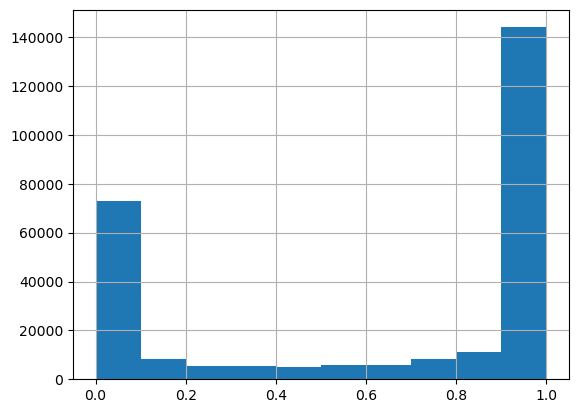

In [ ]:
trustworthiness_scores_all["trustworthiness"].hist();

In [ ]:
#trustworthiness_scores_all.to_csv("../data/trustworthiness_scores.csv", index=False)

### Example for convergence

In [12]:
yearly_data = df[(df.period == str(2022))]# & (df.cmdCode == "03")]
yearly_data = yearly_data[["reporterCode", "partnerCode", "primaryValue"]].merge(yearly_data[["reporterCode", "partnerCode", "mirrorPrimaryValue"]], \
                                                                        left_on=["reporterCode", "partnerCode"], right_on=["partnerCode", "reporterCode"],\
                                                                           suffixes=(None, "_x"))
yearly_data.drop(columns=["reporterCode_x", "partnerCode_x"], inplace=True)
yearly_data.columns = ["country_id", "partner_country_id", "export_value", "import_value"]
yearly_data.reset_index(drop=True, inplace=True)
#yearly_data.head(3)
trustworthiness_scores_, avg_iter = compute_trustworthiness(yearly_data, n_iter=200)

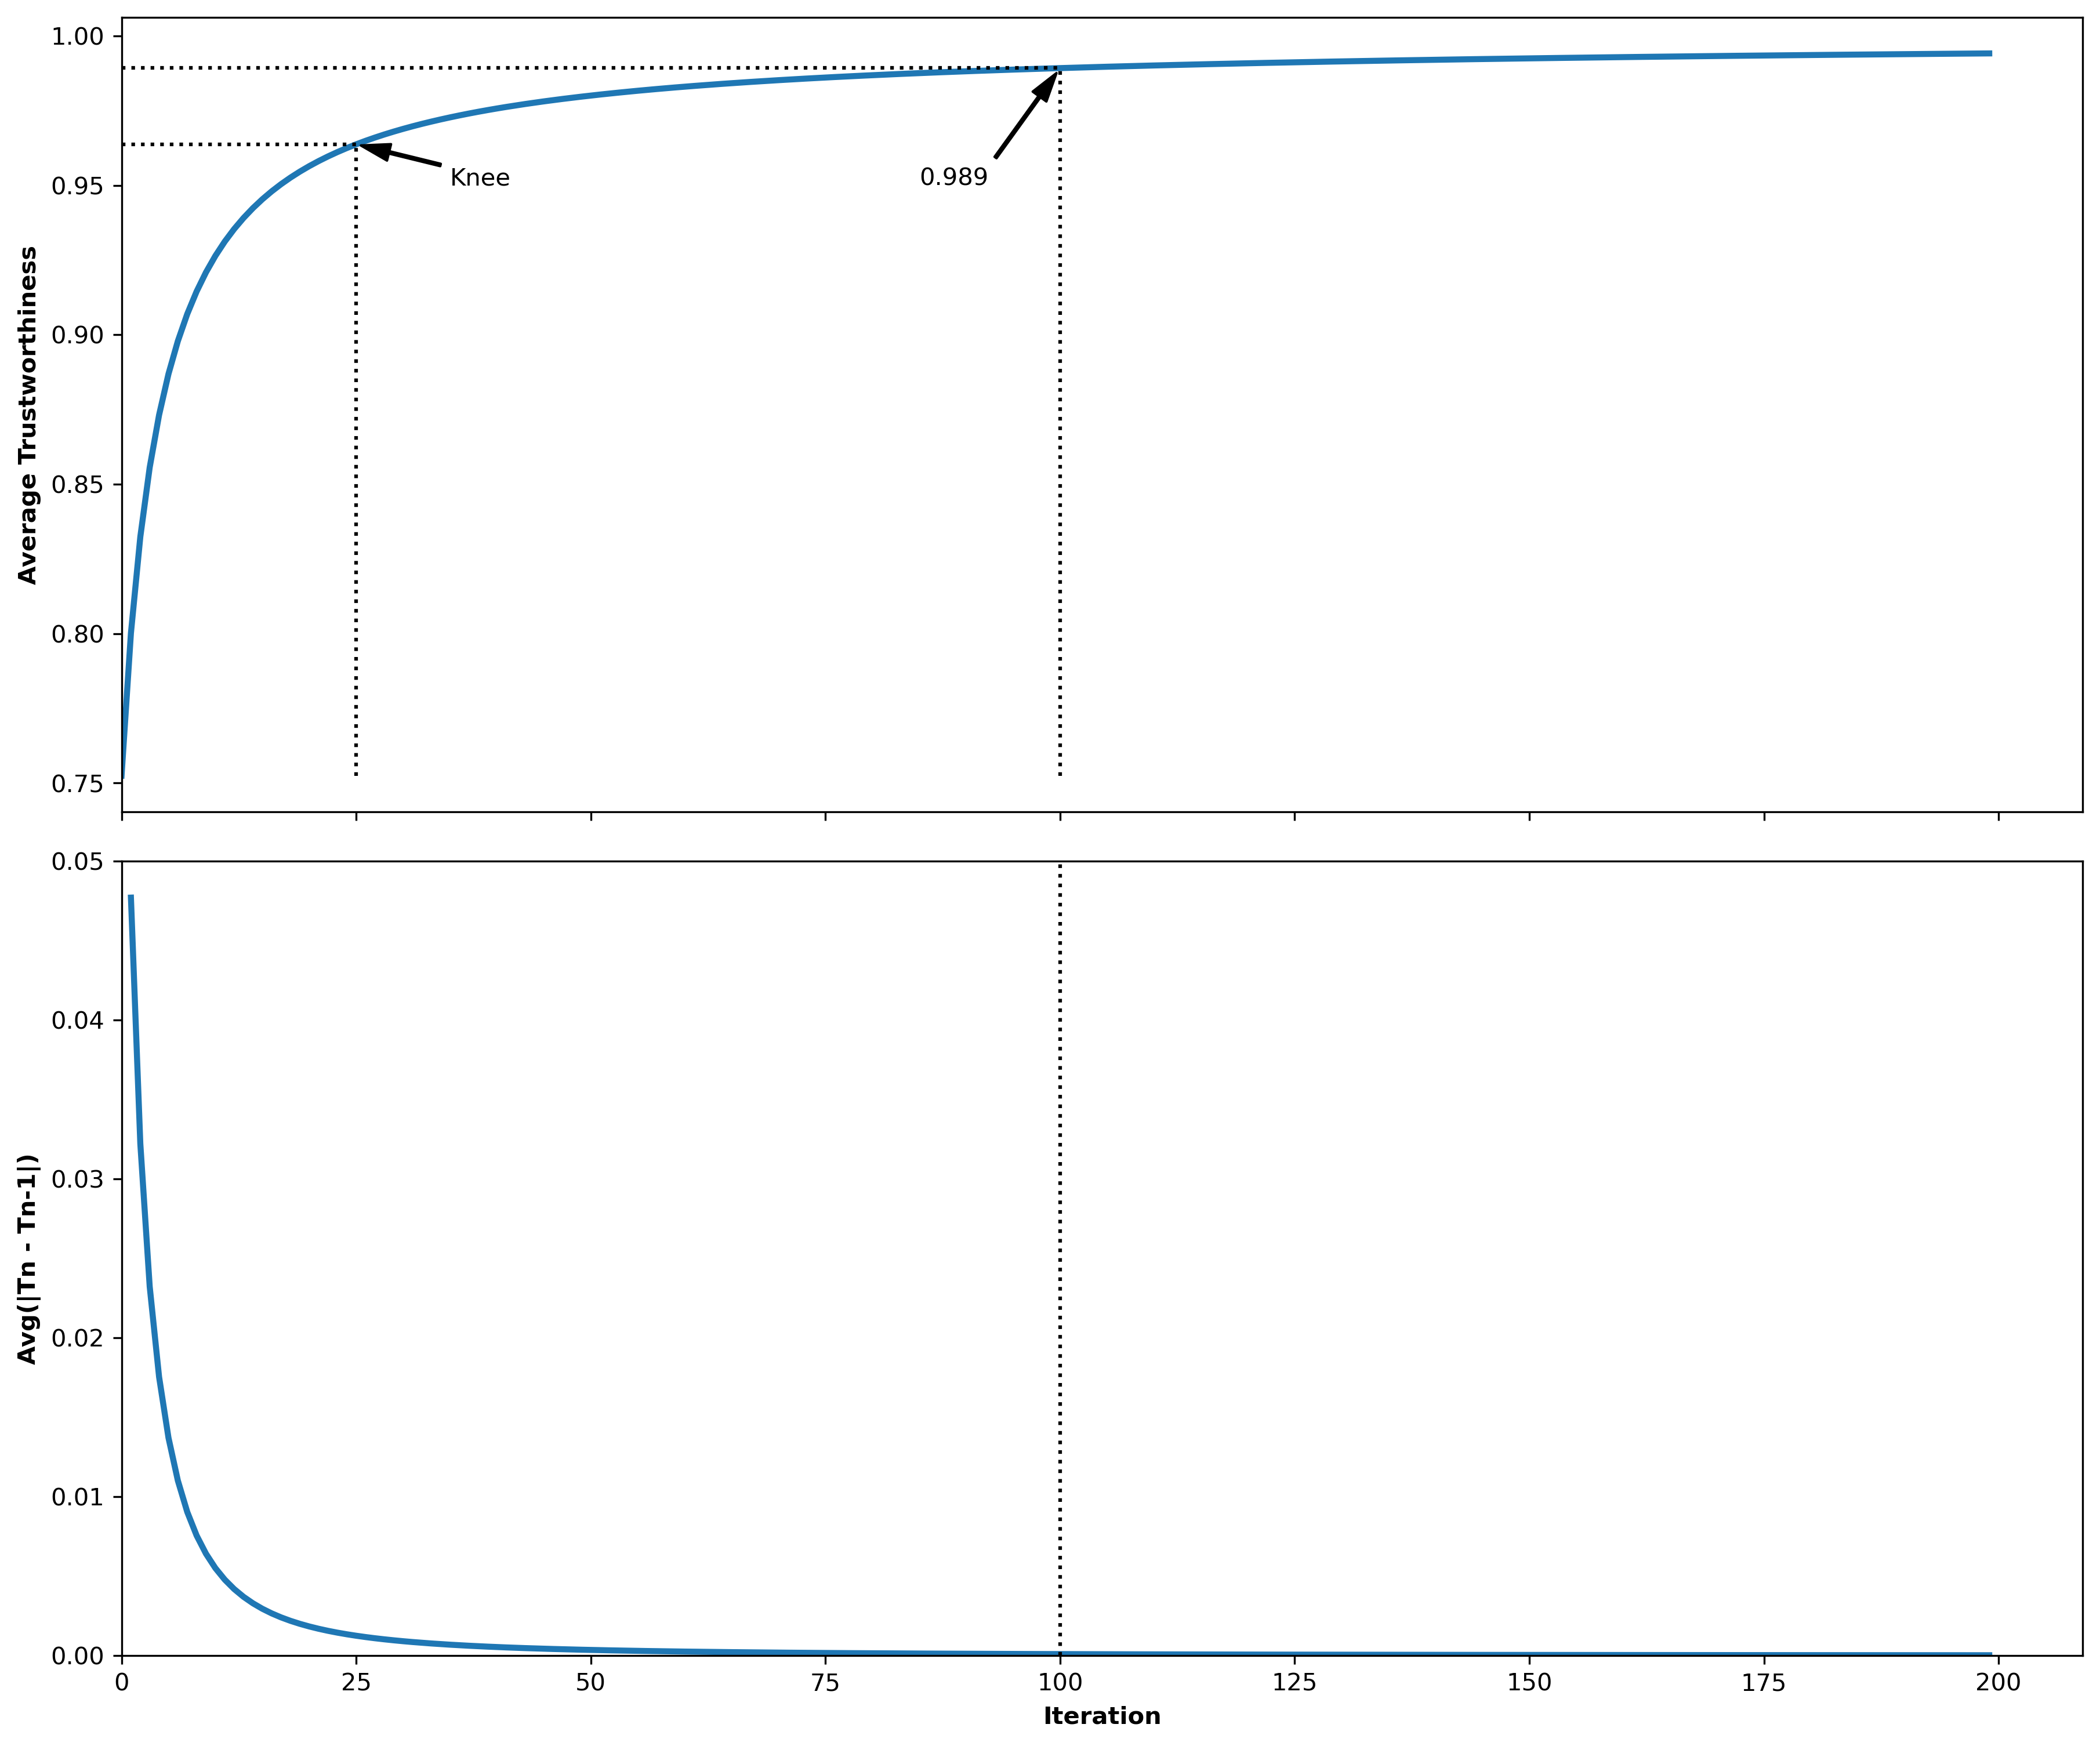

In [40]:
#from matplotlib import rc
avg_iter = pd.DataFrame(avg_iter, columns=["avg_trust"])
avg_iter["change"] = avg_iter.avg_trust.diff()

kneedle = KneeLocator(avg_iter.index, avg_iter.avg_trust, S=1.0, curve="concave", direction="increasing")

fig, ax = plt.subplots(2, 1, figsize=(12, 10), dpi=300, sharex=True)
plt.tight_layout()
ax[0].plot(avg_iter.index, avg_iter.avg_trust, linewidth=2.5)
ax[1].plot(avg_iter.index, avg_iter.change, linewidth=2.5)
ax[1].set_xlabel("Iteration", fontweight="bold")
ax[0].set_ylabel("Average Trustworthiness", fontweight="bold")
ax[1].set_ylabel("Avg(|Tn - Tn-1|)", fontweight="bold")
ax[0].vlines(x=100, ymin=avg_iter.avg_trust.min(), ymax=0.9892070356847943, color="k", linestyle=":")
ax[1].vlines(x=100, ymin=0, ymax=0.05, color="k", linestyle=":")
ax[0].hlines(y=0.9892070356847943, xmin=0, xmax=100, color="k", linestyle=":")
ax[0].vlines(x=kneedle.knee, ymin=avg_iter.avg_trust.min(), ymax=kneedle.knee_y, color="k", linestyle=":")
ax[0].hlines(y=kneedle.knee_y, xmin=0, xmax=kneedle.knee, color="k", linestyle=":")
ax[0].annotate("Knee", xy=(kneedle.knee, kneedle.knee_y), xytext=(35, 0.95), arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink=0.05))
ax[0].annotate("0.989", xy=(100, 0.9892070356847943), xytext=(85, 0.95), arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink=0.05))
ax[0].set_xlim(0)
ax[1].set_xlim(0)
ax[1].set_ylim(0,0.05);
#ax.title("Convergence of Trustworthiness")

#### Show a few nodes

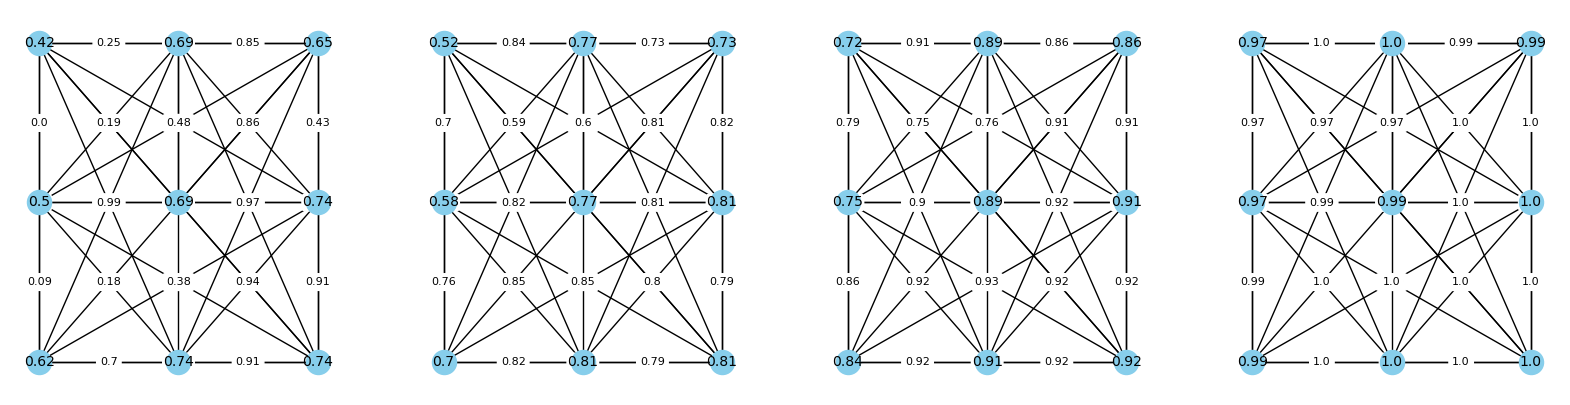

In [10]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for ix, j in enumerate([0, 1, 5, 100]):
    _ = compute_trustworthiness(yearly_data, n_iter=j)
    _["T_ab"] = _["T_ab"].round(2)
    nodes_attr = _[["country_id_x", "T_a"]].groupby("country_id_x").max().reset_index()
    nodes_attr["T_a"] = nodes_attr["T_a"].round(2)
    #print(_)
    G = nx.from_pandas_edgelist(_, source="country_id_x", target="partner_country_id_x", edge_attr="T_ab")
    pos = {list(G.nodes)[x]: y for x, y in enumerate([(0,2), (1,2), (2,2), (0,1), (1,1), (2, 1), (0,0), (1,0), (2,0)])}
    nod_labels = nodes_attr.set_index("country_id_x").to_dict()["T_a"]
    nod_labels = {k: v for k, v in nod_labels.items() if k in pos.keys()}
    nx.draw(nx.subgraph(G, nbunch=pos.keys()), pos=pos, with_labels=False, node_color="skyblue", font_size=8, ax=ax[ix])
    nx.draw_networkx_labels(nx.subgraph(G, nbunch=pos.keys()), pos, labels=nod_labels, font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', ax=ax[ix])
    nx.draw_networkx_edge_labels(nx.subgraph(G, nbunch=pos.keys()), pos=pos, edge_labels=nx.get_edge_attributes(nx.subgraph(G, nbunch=pos.keys()), 'T_ab'), label_pos=0.5,  rotate=False, font_size=8, ax=ax[ix])

plt.show()

#### Trustworthiness index - 100 iters

In [25]:
trustworthiness_scores = compute_trustworthiness(yearly_data, n_iter=100)
trustworthiness_scores = trustworthiness_scores[["country_id_x", "T_a"]].drop_duplicates(subset=["country_id_x"], keep="first")
trustworthiness_scores.head()

,country_id_x,T_a
0,4,0.969550
13,8,0.989397
30,12,0.975310
52,24,0.991552
58,31,0.987461


#### Comparison with Discrepancy index

In [27]:
discrepancy_index = pd.read_csv("../data/DISCREPANCY_INDEX_H5_2017_csv.zip")
discrepancy_index = discrepancy_index.groupby("CountryA")["DI"].mean().reset_index()
trustworthiness_scores_countries = trustworthiness_scores.merge(countries[["country_id", "iso3_code"]], left_on="country_id_x", right_on="country_id", how="left")
trustworthiness_scores_countries = trustworthiness_scores_countries.merge(discrepancy_index, left_on="iso3_code", right_on="CountryA", how="left")
trustworthiness_scores_countries.head()

C:\Users\ginof\AppData\Local\Temp\ipykernel_15036\200576972.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  discrepancy_index = pd.read_csv("../data/DISCREPANCY_INDEX_H5_2017_csv.zip")


,country_id_x,T_a,country_id,iso3_code,CountryA,DI
0,4,0.969550,4.0,AFG,AFG,1.000000
1,8,0.989397,8.0,ALB,ALB,0.552961
2,12,0.975310,12.0,DZA,DZA,-0.315775
3,24,0.991552,24.0,AGO,AGO,1.000000
4,31,0.987461,31.0,AZE,AZE,1.000000


In [28]:
test = trustworthiness_scores_countries.dropna()
np.corrcoef(abs(test.DI), test.T_a)

array([[1.        , 0.02983203],
       [0.02983203, 1.        ]])

#### Data summary

In [29]:
trustworthiness_scores.describe()

,country_id_x,T_a
count,162.000000,162.000000
mean,434.185185,0.961773
std,248.430307,0.107494
min,4.000000,0.018498
25%,219.000000,0.973842
50%,441.000000,0.988040
75%,642.750000,0.993329
max,894.000000,0.999999
